# Coding Assignment 6 :

In [ ]:
from google.colab import files
from IPython.display import Image

uploaded = files.upload()

Saving coding6.jpg to coding6.jpg


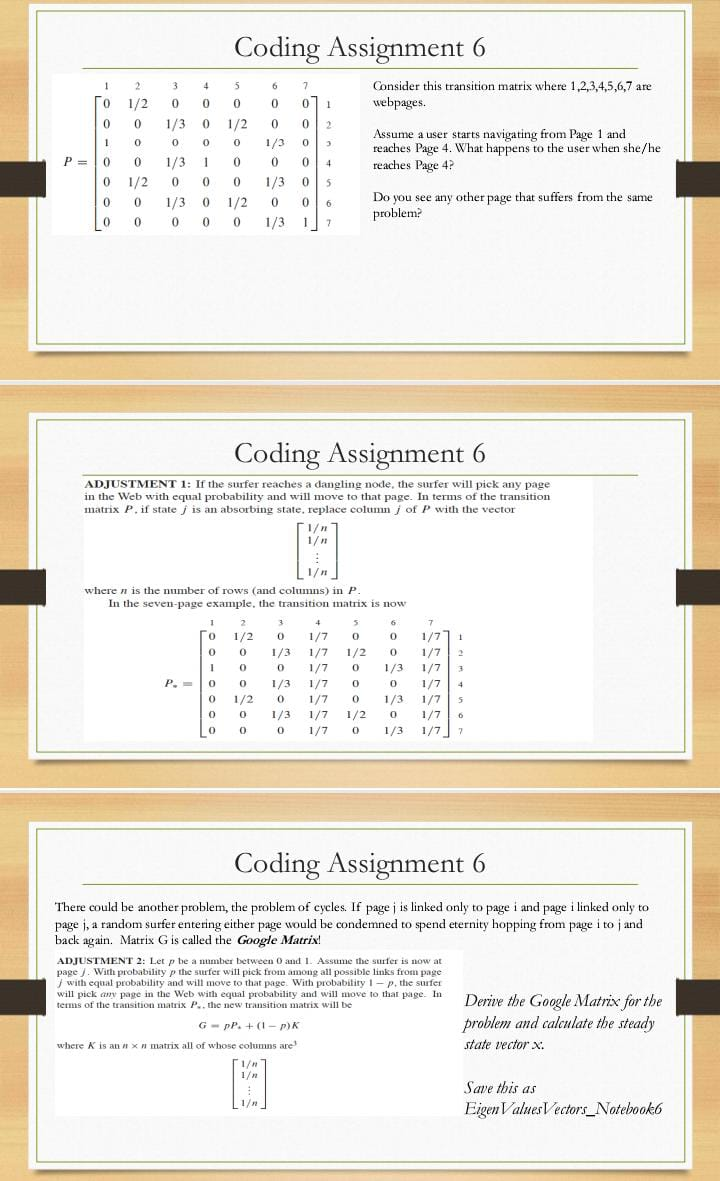

In [ ]:
Image('coding6.jpg',width = 520)

**Transition Matrix (P):**

* The transition matrix
P represents the probabilities of transitioning from one state  to another.

* Each row of
P represents the probabilities of transitioning from the corresponding webpage to all other webpages.

**Adjustment 1: Handling Dangling Nodes:**

* Dangling nodes are pages with no outgoing links. To handle these, we replace the columns corresponding to dangling nodes with [1/n, 1/n], where
n is the number of pages.

* This adjustment ensures that the surfer doesn't get stuck at a dangling node but instead jumps to any page uniformly at random.

**Adjustment 2: Deriving the Google Matrix (G):**

* The Google Matrix G is derived from the transition matrix P to account for the PageRank algorithm.
* The Google Matrix introduces the idea of a surfer occasionally jumping to a random page.
It is calculated using the formula 𝐺=𝑝𝑃+(1−𝑝)𝑘, where p is the probability of following a link (usually 0.85), and k is a matrix with all columns equal to 1/n, where n is the number of pages.

In [1]:
import numpy as np

# Transition matrix P
P = np.array([[0, 1/2, 0, 0, 0, 0, 0],
              [0, 0, 1/3, 0, 1/2, 0, 0],
              [1, 0, 0, 0, 0, 1/3, 0],
              [0, 0, 1/3, 1, 0, 0, 0],
              [0, 1/2, 0, 0, 0, 1/3, 0],
              [0, 0, 1/3, 0, 1/2, 0, 0],
              [0, 0, 0, 0, 0, 1/3, 1]])

**Handling Dangling Nodes - Modified Transition Matrix (P):**

In [2]:
# Display: Replace columns corresponding to dangling nodes with [1/n, 1/n]
n = len(P)
for i in range(n):
    if np.sum(P[:, i]) == 0:
        P[:, i] = np.ones(n) / n

print("Replace columns corresponding to dangling nodes with [1/n, 1/n]:")
print(P)

Replace columns corresponding to dangling nodes with [1/n, 1/n]:
[[0.         0.5        0.         0.         0.         0.
  0.        ]
 [0.         0.         0.33333333 0.         0.5        0.
  0.        ]
 [1.         0.         0.         0.         0.         0.33333333
  0.        ]
 [0.         0.         0.33333333 1.         0.         0.
  0.        ]
 [0.         0.5        0.         0.         0.         0.33333333
  0.        ]
 [0.         0.         0.33333333 0.         0.5        0.
  0.        ]
 [0.         0.         0.         0.         0.         0.33333333
  1.        ]]


**Google Matrix (G):**

In [3]:
# Adjustment 2: Derive the Google Matrix G
p = 0.85  # probability of following a link
k = np.ones((n, n)) / n  # matrix k

G = p * P + (1 - p) * k

print("\nDerive the Google Matrix G:")
print(G)


Derive the Google Matrix G:
[[0.02142857 0.44642857 0.02142857 0.02142857 0.02142857 0.02142857
  0.02142857]
 [0.02142857 0.02142857 0.3047619  0.02142857 0.44642857 0.02142857
  0.02142857]
 [0.87142857 0.02142857 0.02142857 0.02142857 0.02142857 0.3047619
  0.02142857]
 [0.02142857 0.02142857 0.3047619  0.87142857 0.02142857 0.02142857
  0.02142857]
 [0.02142857 0.44642857 0.02142857 0.02142857 0.02142857 0.3047619
  0.02142857]
 [0.02142857 0.02142857 0.3047619  0.02142857 0.44642857 0.02142857
  0.02142857]
 [0.02142857 0.02142857 0.02142857 0.02142857 0.02142857 0.3047619
  0.87142857]]


**Steady State Vector (x):**

In [4]:
# Calculate steady state vector x
x = np.linalg.matrix_power(G.T, 1000) @ np.ones(n) / n

print("\nPage-wise steady state probabilities (Steady state vector x):")
for i, prob in enumerate(x):
    print(f"Page {i+1}: {prob:.4f}")



Page-wise steady state probabilities (Steady state vector x):
Page 1: 0.1429
Page 2: 0.1429
Page 3: 0.1429
Page 4: 0.1429
Page 5: 0.1429
Page 6: 0.1429
Page 7: 0.1429
